# Project 4 - Web Scraping & Logistic Regression
## Analysis Notebook
I used this notebook to read in the CSV that I created from my web scrape. Then I cleaned the data and built the models.

## Problem statement:
I will be working with data that I web scraped from indeed.com for data science job postings. The goal is to clean the data and build logistic regression models to predict whether or not jobs will give an applicant a high salary or not.

## Risks and Assumptions:
As you will see below, the data scraped from the website is not clean at all. A lot of work will spent on cleaning the data in each column and creating variables to put into the predictive models. Without more domain knowledge, the selection of variables and thresholds may not as accurate as they could be. Also, with such few postings that contain salary information, it may be more difficult to build an accurate model.

## Cleaning:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read in CSV
df = pd.read_csv('/Users/ct/DSI-NYC-4/projects/project-4-webscraping/project_4_data.csv')

In [3]:
# Checking data formats
df.head()

,Unnamed: 0,JobTitle,Company,Location,Salary,Summary
0,0,\nSr Data Scientist\n,\n\n\n Wells Fargo\n,Charlotte,NaN,"\nRight now, we are looking for a tenured data..."
1,1,\nResearch Analyst\n,\n\n\n Carolinas HealthCare System\n,Charlotte,NaN,\nConducts follow up contacts to collect data ...
2,2,\nBiostatistics/Bioinformatics Research Scient...,\n\n\n UNC Charlotte\n,Charlotte,"$60,000 - $80,000 a year",\nGenetics/genomics data analysis (esp. Enjoy ...
3,3,\nDigital Marketing (Data Scientist)\n,"\n\n Kennedy Unlimited Inc, Professional St...",Charlotte,"$100,000 - $130,000 a year",\nResponsibilities of the Digital Marketing (D...
4,4,\nSenior Quantitative Finance Analyst\n,\n\n iiTS\n,Charlotte,"$140,000 a year","\nAssessing conceptual foundations of a model,..."


In [4]:
# checking size of dataframe
df.shape

(3960, 6)

In [5]:
# removing "unnamed: 0" column
df=df.iloc[:,1:]

In [6]:
df.head()

,JobTitle,Company,Location,Salary,Summary
0,\nSr Data Scientist\n,\n\n\n Wells Fargo\n,Charlotte,NaN,"\nRight now, we are looking for a tenured data..."
1,\nResearch Analyst\n,\n\n\n Carolinas HealthCare System\n,Charlotte,NaN,\nConducts follow up contacts to collect data ...
2,\nBiostatistics/Bioinformatics Research Scient...,\n\n\n UNC Charlotte\n,Charlotte,"$60,000 - $80,000 a year",\nGenetics/genomics data analysis (esp. Enjoy ...
3,\nDigital Marketing (Data Scientist)\n,"\n\n Kennedy Unlimited Inc, Professional St...",Charlotte,"$100,000 - $130,000 a year",\nResponsibilities of the Digital Marketing (D...
4,\nSenior Quantitative Finance Analyst\n,\n\n iiTS\n,Charlotte,"$140,000 a year","\nAssessing conceptual foundations of a model,..."


In [7]:
# cleaning job title column
df['JobTitle'] = df['JobTitle'].apply(lambda x: x.replace('\n',''))

In [8]:
# removing rows where company is not listed
df = df[pd.notnull(df['Company'])]

# cleaning company column
df['Company'] = df['Company'].apply(lambda x: x.replace('\n',''))
df['Company'] = df['Company'].apply(lambda x: x.lstrip())

In [9]:
#cleaning summary column
df['Summary'] = df['Summary'].apply(lambda x: x.replace('\n',''))

In [10]:
df.head()

,JobTitle,Company,Location,Salary,Summary
0,Sr Data Scientist,Wells Fargo,Charlotte,NaN,"Right now, we are looking for a tenured data s..."
1,Research Analyst,Carolinas HealthCare System,Charlotte,NaN,Conducts follow up contacts to collect data fo...
2,Biostatistics/Bioinformatics Research Scientist,UNC Charlotte,Charlotte,"$60,000 - $80,000 a year",Genetics/genomics data analysis (esp. Enjoy co...
3,Digital Marketing (Data Scientist),"Kennedy Unlimited Inc, Professional Staffing",Charlotte,"$100,000 - $130,000 a year",Responsibilities of the Digital Marketing (Dat...
4,Senior Quantitative Finance Analyst,iiTS,Charlotte,"$140,000 a year","Assessing conceptual foundations of a model, m..."


In [11]:
# checking number of unique job titles
df['JobTitle'].nunique()

3106

In [12]:
df['JobTitle'].unique()

array(['Sr Data Scientist', 'Research Analyst',
       'Biostatistics/Bioinformatics Research Scientist', ...,
       'Sr .NET Software Engineer',
       'Data Science Engineer I, Data Science Engineer II or Senior...',
       'Project Analyst/Coordinator - Research Applications (System/...'], dtype=object)

In [13]:
# checking job titles
df['JobTitle'].value_counts()

Data Scientist                                                     118
Research Analyst                                                    48
Senior Data Scientist                                               44
Data Engineer                                                       26
Research Scientist                                                  23
Machine Learning Engineer                                           20
Sr. Data Scientist                                                  20
Quantitative Analyst                                                18
Software Engineer                                                   15
Scientist                                                           13
Sr Data Scientist                                                   13
Statistical Analyst                                                 11
Principal Data Scientist                                            11
Scientist I                                                         11
Senior

In [14]:
# checking number of companies
df['Company'].nunique()

1782

In [15]:
df['Company'].unique()

array(['Wells Fargo', 'Carolinas HealthCare System', 'UNC Charlotte', ...,
       'Centizen', 'nLIGHT', 'NIKE INC'], dtype=object)

In [16]:
# checking company names
df['Company'].value_counts()

Ball Aerospace                                       56
The Aerospace Corporation                            31
Walmart eCommerce                                    29
University of Washington Medical Center              28
Microsoft                                            27
Facebook                                             26
Fred Hutchinson Cancer Research Center               26
University of Washington                             24
Pfizer Inc.                                          23
Takeda Pharmaceutical                                23
Reed Elsevier                                        22
Accenture                                            21
Janssen Research & Development, LLC.                 19
Jobspring Partners                                   19
UCLA Health                                          17
McKinsey & Company                                   17
Lockheed Martin                                      17
Netflix                                         

In [17]:
# checking location number
df['Location'].nunique()

20

In [18]:
df['Location'].unique()

array(['Charlotte', 'Salt+Lake+City', 'Arlington', 'Chicago',
       'San+Francisco', 'New+York', 'Dallas', 'Orlando', 'Philadelphia',
       'Minneapolis', 'Los+Angeles', 'San+Jose', 'San+Diego', 'Houston',
       'Denver', 'Boston', 'Atlanta', 'Seattle', 'Austin', 'Portland'], dtype=object)

In [19]:
# checking location names
df['Location'].value_counts()

Boston            455
San+Jose          441
San+Francisco     428
New+York          425
Los+Angeles       292
Seattle           282
Chicago           232
Philadelphia      220
San+Diego         191
Denver            148
Atlanta           143
Arlington         124
Minneapolis       106
Dallas            101
Austin             96
Houston            81
Portland           58
Charlotte          50
Salt+Lake+City     48
Orlando            38
Name: Location, dtype: int64

In [20]:
# checking salaries
df['Salary'].value_counts()

$140,000 a year               10
$120,000 a year                9
$170,000 a year                8
$150,000 a year                8
$100,000 a year                7
$200,000 a year                6
$160,000 a year                6
$20 an hour                    5
$130,000 a year                5
$48,000 a year                 3
$50,000 a year                 3
$100,000 - $130,000 a year     3
$60,000 - $80,000 a year       3
$21.26 an hour                 3
$80,000 - $110,000 a year      2
$145,000 a year                2
$98 an hour                    2
$150,000 - $200,000 a year     2
$4,319 - $6,183 a month        2
$120,000 - $140,000 a year     2
$70,286 - $88,213 a year       2
$4,319 - $6,371 a month        2
$60,000 - $70,000 a year       2
$5,400 - $6,500 a month        2
$17 an hour                    2
$60,700 - $115,300 a year      2
$165,000 a year                2
$155,000 a year                2
$6,250 - $10,833 a month       2
$140,000 - $160,000 a year     2
          

In [21]:
# checking number of postings with salaries
df['Salary'].count()

240

In [22]:
df.head()

,JobTitle,Company,Location,Salary,Summary
0,Sr Data Scientist,Wells Fargo,Charlotte,NaN,"Right now, we are looking for a tenured data s..."
1,Research Analyst,Carolinas HealthCare System,Charlotte,NaN,Conducts follow up contacts to collect data fo...
2,Biostatistics/Bioinformatics Research Scientist,UNC Charlotte,Charlotte,"$60,000 - $80,000 a year",Genetics/genomics data analysis (esp. Enjoy co...
3,Digital Marketing (Data Scientist),"Kennedy Unlimited Inc, Professional Staffing",Charlotte,"$100,000 - $130,000 a year",Responsibilities of the Digital Marketing (Dat...
4,Senior Quantitative Finance Analyst,iiTS,Charlotte,"$140,000 a year","Assessing conceptual foundations of a model, m..."


In [23]:
# cleaning location column
df['Location'] = df['Location'].apply(lambda x: x.replace('+',' '))

In [24]:
df['Location'].value_counts()

Boston            455
San Jose          441
San Francisco     428
New York          425
Los Angeles       292
Seattle           282
Chicago           232
Philadelphia      220
San Diego         191
Denver            148
Atlanta           143
Arlington         124
Minneapolis       106
Dallas            101
Austin             96
Houston            81
Portland           58
Charlotte          50
Salt Lake City     48
Orlando            38
Name: Location, dtype: int64

In [25]:
# creating a dataframe with only the postings that contain salary information
# i'll be using these postings to build the models
dfs=df.dropna()

In [26]:
# checking size of new dataframe
dfs.shape

(240, 5)

In [27]:
dfs['Location'].value_counts()

New York          34
Los Angeles       30
Seattle           22
Chicago           19
San Francisco     16
Austin            16
San Jose          14
Boston            13
Salt Lake City    10
Atlanta            9
Charlotte          9
Arlington          7
Dallas             7
Philadelphia       7
Minneapolis        6
Houston            6
Denver             5
Portland           4
Orlando            3
San Diego          3
Name: Location, dtype: int64

In [28]:
dfs.head()

,JobTitle,Company,Location,Salary,Summary
2,Biostatistics/Bioinformatics Research Scientist,UNC Charlotte,Charlotte,"$60,000 - $80,000 a year",Genetics/genomics data analysis (esp. Enjoy co...
3,Digital Marketing (Data Scientist),"Kennedy Unlimited Inc, Professional Staffing",Charlotte,"$100,000 - $130,000 a year",Responsibilities of the Digital Marketing (Dat...
4,Senior Quantitative Finance Analyst,iiTS,Charlotte,"$140,000 a year","Assessing conceptual foundations of a model, m..."
10,Sr Hadoop Architect/Data Scientist,Sherpa LLC,Charlotte,$98 an hour,Experience with batch and streaming data proce...
30,SVP Quantitative Analyst - Multiple Vacancies,Selby Jennings,Charlotte,"$150,000 a year",A Top Tier Investment Bank is looking for an e...


In [29]:
dfs['JobTitle'].value_counts()

Data Scientist                                                     12
Research Analyst                                                    8
Senior Data Scientist                                               5
Principal Data Scientist                                            3
Digital Marketing (Data Scientist)                                  3
RESEARCH STUDY COORDINATOR 1                                        2
MEDICAL LABORATORY SCIENTIST-TRAINEE OR 1                           2
Sr Hadoop Architect/Data Scientist                                  2
Machine Learning Engineer                                           2
Geospatial Data Scientist/Software Engineer                         2
MEDICAL LABORATORY SCIENTIST 1 OR TRAINEE                           2
Research Scientist II                                               2
RISK ANALYST - statistical modeling / SAS                           2
Admin Assistant with financial reporting exp, data analysis...      2
TRUCK DRIVER 1      

In [30]:
dfs['Company'].value_counts()

Jobspring Partners                                       18
Harnham                                                  12
Workbridge Associates                                    11
Selby Jennings                                           10
University of Washington Medical Center                   9
University of Texas at Austin                             7
University of Washington                                  6
Intermountain Healthcare                                  5
Lighthouse Recruiting                                     5
University of Utah                                        4
Texas Department of Public Safety                         3
LT                                                        3
Kennedy Unlimited Inc, Professional Staffing              3
ZeroChaos                                                 3
Los Angeles County Department of Human Resources          3
Sherpa LLC                                                2
University of Minnesota                 

In [31]:
dfs['Salary'].value_counts()

$140,000 a year               10
$120,000 a year                9
$150,000 a year                8
$170,000 a year                8
$100,000 a year                7
$200,000 a year                6
$160,000 a year                6
$20 an hour                    5
$130,000 a year                5
$60,000 - $80,000 a year       3
$100,000 - $130,000 a year     3
$48,000 a year                 3
$50,000 a year                 3
$21.26 an hour                 3
$155,000 a year                2
$140,000 - $160,000 a year     2
$60,000 - $70,000 a year       2
$4,319 - $6,183 a month        2
$60,000 a year                 2
$150,000 - $200,000 a year     2
$98 an hour                    2
$145,000 a year                2
$110,000 a year                2
$65,000 a year                 2
$165,000 a year                2
$60,700 - $115,300 a year      2
$17 an hour                    2
$3,635 - $4,888 a month        2
$120,000 - $140,000 a year     2
$14 - $15 an hour              2
          

In [32]:
# cleaning salary
dfs['Salary'] = dfs['Salary'].apply(lambda x: x.replace('$',''))
dfs['Salary'] = dfs['Salary'].apply(lambda x: x.replace(',',''))

/Users/ct/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/ct/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [33]:
# resetting the dataframe index
dfs.reset_index(inplace=True, drop=True)

In [34]:
dfs.head()

,JobTitle,Company,Location,Salary,Summary
0,Biostatistics/Bioinformatics Research Scientist,UNC Charlotte,Charlotte,60000 - 80000 a year,Genetics/genomics data analysis (esp. Enjoy co...
1,Digital Marketing (Data Scientist),"Kennedy Unlimited Inc, Professional Staffing",Charlotte,100000 - 130000 a year,Responsibilities of the Digital Marketing (Dat...
2,Senior Quantitative Finance Analyst,iiTS,Charlotte,140000 a year,"Assessing conceptual foundations of a model, m..."
3,Sr Hadoop Architect/Data Scientist,Sherpa LLC,Charlotte,98 an hour,Experience with batch and streaming data proce...
4,SVP Quantitative Analyst - Multiple Vacancies,Selby Jennings,Charlotte,150000 a year,A Top Tier Investment Bank is looking for an e...


In [35]:
dfs['Salary'].value_counts()

140000 a year             10
120000 a year              9
150000 a year              8
170000 a year              8
100000 a year              7
160000 a year              6
200000 a year              6
20 an hour                 5
130000 a year              5
60000 - 80000 a year       3
48000 a year               3
50000 a year               3
21.26 an hour              3
100000 - 130000 a year     3
60000 a year               2
105000 a year              2
110000 a year              2
3635 - 4888 a month        2
80000 - 110000 a year      2
57150 a year               2
140000 - 160000 a year     2
150000 - 200000 a year     2
145000 a year              2
17 an hour                 2
165000 a year              2
4319 - 6371 a month        2
120000 - 140000 a year     2
5400 - 6500 a month        2
98 an hour                 2
2977 - 3427 a month        2
                          ..
45000 - 50000 a year       1
45 - 52 an hour            1
4083 - 4696 a month        1
33 an hour    

In [36]:
dfs.iloc[71]

JobTitle                              Senior Technician - CLM
Company                                   Columbia University
Location                                             New York
Salary                                             886 a week
Summary     He/she will be responsible for maintaining all...
Name: 71, dtype: object

In [37]:
# creating a dataframe for postings with yearly salaries
dfsyear=dfs[dfs['Salary'].str.contains("year")]

In [38]:
dfsyear.head()

,JobTitle,Company,Location,Salary,Summary
0,Biostatistics/Bioinformatics Research Scientist,UNC Charlotte,Charlotte,60000 - 80000 a year,Genetics/genomics data analysis (esp. Enjoy co...
1,Digital Marketing (Data Scientist),"Kennedy Unlimited Inc, Professional Staffing",Charlotte,100000 - 130000 a year,Responsibilities of the Digital Marketing (Dat...
2,Senior Quantitative Finance Analyst,iiTS,Charlotte,140000 a year,"Assessing conceptual foundations of a model, m..."
4,SVP Quantitative Analyst - Multiple Vacancies,Selby Jennings,Charlotte,150000 a year,A Top Tier Investment Bank is looking for an e...
5,Data Scientist,Oak Grove Partners,Charlotte,120000 - 140000 a year,Data Visualization Tools:. Facilitate fast and...


In [39]:
# cleaning salary column for yearly salaries dataframe
dfsyear['Salary'] = dfsyear['Salary'].map(lambda x: x.rstrip(' a year'))

/Users/ct/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [40]:
dfsyear.head()

,JobTitle,Company,Location,Salary,Summary
0,Biostatistics/Bioinformatics Research Scientist,UNC Charlotte,Charlotte,60000 - 80000,Genetics/genomics data analysis (esp. Enjoy co...
1,Digital Marketing (Data Scientist),"Kennedy Unlimited Inc, Professional Staffing",Charlotte,100000 - 130000,Responsibilities of the Digital Marketing (Dat...
2,Senior Quantitative Finance Analyst,iiTS,Charlotte,140000,"Assessing conceptual foundations of a model, m..."
4,SVP Quantitative Analyst - Multiple Vacancies,Selby Jennings,Charlotte,150000,A Top Tier Investment Bank is looking for an e...
5,Data Scientist,Oak Grove Partners,Charlotte,120000 - 140000,Data Visualization Tools:. Facilitate fast and...


In [41]:
# using split to separate salary numbers so that i can do math on them
dfsyear['Salary'] = dfsyear['Salary'].map(lambda x: x.split(' - '))

/Users/ct/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [42]:
dfsyear.head()

,JobTitle,Company,Location,Salary,Summary
0,Biostatistics/Bioinformatics Research Scientist,UNC Charlotte,Charlotte,"[60000, 80000]",Genetics/genomics data analysis (esp. Enjoy co...
1,Digital Marketing (Data Scientist),"Kennedy Unlimited Inc, Professional Staffing",Charlotte,"[100000, 130000]",Responsibilities of the Digital Marketing (Dat...
2,Senior Quantitative Finance Analyst,iiTS,Charlotte,[140000],"Assessing conceptual foundations of a model, m..."
4,SVP Quantitative Analyst - Multiple Vacancies,Selby Jennings,Charlotte,[150000],A Top Tier Investment Bank is looking for an e...
5,Data Scientist,Oak Grove Partners,Charlotte,"[120000, 140000]",Data Visualization Tools:. Facilitate fast and...


In [43]:
# this function calculates the yearly salary if a range is given
# i decided to go with the average of the 2 numbers

def yearcalc(x):
    if len(x)==2:
        avg=(int(x[0])+int(x[1]))/2
        return avg
    else:
        sal=int(x[0])
        return sal

In [44]:
# using the above function to make the salary column a uniform one. with each row having 1 integer
dfsyear['Salary'] = dfsyear['Salary'].apply(lambda x: yearcalc(x))

/Users/ct/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [45]:
dfsyear.shape

(162, 5)

In [46]:
# checking to see if my cleaning worked
dfsyear.head()

,JobTitle,Company,Location,Salary,Summary
0,Biostatistics/Bioinformatics Research Scientist,UNC Charlotte,Charlotte,70000,Genetics/genomics data analysis (esp. Enjoy co...
1,Digital Marketing (Data Scientist),"Kennedy Unlimited Inc, Professional Staffing",Charlotte,115000,Responsibilities of the Digital Marketing (Dat...
2,Senior Quantitative Finance Analyst,iiTS,Charlotte,140000,"Assessing conceptual foundations of a model, m..."
4,SVP Quantitative Analyst - Multiple Vacancies,Selby Jennings,Charlotte,150000,A Top Tier Investment Bank is looking for an e...
5,Data Scientist,Oak Grove Partners,Charlotte,130000,Data Visualization Tools:. Facilitate fast and...


In [47]:
# repeating the process above, this time for monthly salaries.
# if there were more postings with salaries i would have dropped
# all non-yearly salary entries but with such few entries I converted
# everything to yearly salary

dfsmonth=dfs[dfs['Salary'].str.contains("month")]
dfsmonth['Salary'] = dfsmonth['Salary'].map(lambda x: x.rstrip(' a month'))
dfsmonth.head()

/Users/ct/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,JobTitle,Company,Location,Salary,Summary
19,Research Analyst II,Dallas County Community College District,Arlington,4083 - 4696,Processes and interprets data from a variety o...
22,Sr. Technical Recruiter,"Afactory HUB, Inc",Arlington,5000,"Product Managers, Data Scientists, Network Eng..."
129,Educational Assessment Research Analyst I,Long Beach City College,Los Angeles,4634 - 5717,Maintains files/records and monitors data inte...
137,CLINICAL LABORATORY SCIENTIST I (Blood Bank),Los Angeles County Department of Human Resources,Los Angeles,7046,"Enters test results, quality control and impro..."
138,CLINICAL LABORATORY SCIENTIST I (North County),Los Angeles County Department of Human Resources,Los Angeles,5988 - 6322,"Enters test results, quality control and impro..."


In [48]:
dfsmonth['Salary'] = dfsmonth['Salary'].map(lambda x: x.split(' - '))

/Users/ct/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [49]:
dfsmonth.shape

(34, 5)

In [50]:
dfsmonth.head()

,JobTitle,Company,Location,Salary,Summary
19,Research Analyst II,Dallas County Community College District,Arlington,"[4083, 4696]",Processes and interprets data from a variety o...
22,Sr. Technical Recruiter,"Afactory HUB, Inc",Arlington,[5000],"Product Managers, Data Scientists, Network Eng..."
129,Educational Assessment Research Analyst I,Long Beach City College,Los Angeles,"[4634, 5717]",Maintains files/records and monitors data inte...
137,CLINICAL LABORATORY SCIENTIST I (Blood Bank),Los Angeles County Department of Human Resources,Los Angeles,[7046],"Enters test results, quality control and impro..."
138,CLINICAL LABORATORY SCIENTIST I (North County),Los Angeles County Department of Human Resources,Los Angeles,"[5988, 6322]","Enters test results, quality control and impro..."


In [51]:
def monthcalc(x):
    if len(x)==2:
        avg=((int(x[0])+int(x[1]))/2)*12
        return avg
    else:
        sal=(int(x[0]))*12
        return sal

In [52]:
dfsmonth['Salary'] = dfsmonth['Salary'].apply(lambda x: monthcalc(x))

/Users/ct/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [53]:
dfsmonth.head()

,JobTitle,Company,Location,Salary,Summary
19,Research Analyst II,Dallas County Community College District,Arlington,52668,Processes and interprets data from a variety o...
22,Sr. Technical Recruiter,"Afactory HUB, Inc",Arlington,60000,"Product Managers, Data Scientists, Network Eng..."
129,Educational Assessment Research Analyst I,Long Beach City College,Los Angeles,62100,Maintains files/records and monitors data inte...
137,CLINICAL LABORATORY SCIENTIST I (Blood Bank),Los Angeles County Department of Human Resources,Los Angeles,84552,"Enters test results, quality control and impro..."
138,CLINICAL LABORATORY SCIENTIST I (North County),Los Angeles County Department of Human Resources,Los Angeles,73860,"Enters test results, quality control and impro..."


In [54]:
# Repeating the process again for hourly rate

dfshour=dfs[dfs['Salary'].str.contains("hour")]
dfshour['Salary'] = dfshour['Salary'].map(lambda x: x.rstrip(' an hour'))
dfshour['Salary'] = dfshour['Salary'].map(lambda x: x.split(' - '))
dfshour.head()

/Users/ct/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ct/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,JobTitle,Company,Location,Salary,Summary
3,Sr Hadoop Architect/Data Scientist,Sherpa LLC,Charlotte,[98],Experience with batch and streaming data proce...
8,Sr Hadoop Architect/Data Scientist,Sherpa LLC,Charlotte,[98],Experience with batch and streaming data proce...
9,Data Analyst-Statistical-Stf,Intermountain Healthcare,Salt Lake City,[33.83],Compares data output to ensure data accuracy. ...
15,Med Tech/MLS-Registered - Park City Hospital -...,Intermountain Healthcare,Salt Lake City,[21.26],Performs periodic regulatory reviews of qualit...
16,Med Tech/MLS-Registered - Park City Medical Ce...,Intermountain Healthcare,Salt Lake City,[21.26],Performs periodic regulatory reviews of qualit...


In [55]:
def hourcalc(x):
    if len(x)==2:
        avg=((((float(x[0])+float(x[1]))/2)*8)*5)*52
        return avg
    else:
        sal=float(x[0])*8*5*52
        return sal

In [56]:
dfshour['Salary'] = dfshour['Salary'].apply(lambda x: hourcalc(x))

/Users/ct/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [57]:
dfshour.shape

(43, 5)

In [58]:
dfshour.head()

,JobTitle,Company,Location,Salary,Summary
3,Sr Hadoop Architect/Data Scientist,Sherpa LLC,Charlotte,203840.0,Experience with batch and streaming data proce...
8,Sr Hadoop Architect/Data Scientist,Sherpa LLC,Charlotte,203840.0,Experience with batch and streaming data proce...
9,Data Analyst-Statistical-Stf,Intermountain Healthcare,Salt Lake City,70366.4,Compares data output to ensure data accuracy. ...
15,Med Tech/MLS-Registered - Park City Hospital -...,Intermountain Healthcare,Salt Lake City,44220.8,Performs periodic regulatory reviews of qualit...
16,Med Tech/MLS-Registered - Park City Medical Ce...,Intermountain Healthcare,Salt Lake City,44220.8,Performs periodic regulatory reviews of qualit...


In [59]:
# repeating one more time for the weekly rate

dfsweek=dfs[dfs['Salary'].str.contains("week")]
dfsweek['Salary'] = dfsweek['Salary'].map(lambda x: x.rstrip(' a week'))
dfsweek['Salary'] = dfsweek['Salary'].map(lambda x: x.split(' - '))

/Users/ct/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ct/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [60]:
def weekcalc(x):
    if len(x)==2:
        avg=((int(x[0])+int(x[1]))/2)*52
        return avg
    else:
        sal=int(x[0])*52
        return sal

In [61]:
dfsweek['Salary'] = dfsweek['Salary'].apply(lambda x: weekcalc(x))

/Users/ct/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [62]:
# concatenating all of the cleaned salaries back into 1 dataframe
dfsx=pd.concat([dfsyear,dfsmonth,dfshour, dfsweek])

In [63]:
dfsx.head()

,JobTitle,Company,Location,Salary,Summary
0,Biostatistics/Bioinformatics Research Scientist,UNC Charlotte,Charlotte,70000.0,Genetics/genomics data analysis (esp. Enjoy co...
1,Digital Marketing (Data Scientist),"Kennedy Unlimited Inc, Professional Staffing",Charlotte,115000.0,Responsibilities of the Digital Marketing (Dat...
2,Senior Quantitative Finance Analyst,iiTS,Charlotte,140000.0,"Assessing conceptual foundations of a model, m..."
4,SVP Quantitative Analyst - Multiple Vacancies,Selby Jennings,Charlotte,150000.0,A Top Tier Investment Bank is looking for an e...
5,Data Scientist,Oak Grove Partners,Charlotte,130000.0,Data Visualization Tools:. Facilitate fast and...


In [64]:
# resetting the index
dfsx.reset_index(inplace=True, drop=True)

In [65]:
dfsx.head()

,JobTitle,Company,Location,Salary,Summary
0,Biostatistics/Bioinformatics Research Scientist,UNC Charlotte,Charlotte,70000.0,Genetics/genomics data analysis (esp. Enjoy co...
1,Digital Marketing (Data Scientist),"Kennedy Unlimited Inc, Professional Staffing",Charlotte,115000.0,Responsibilities of the Digital Marketing (Dat...
2,Senior Quantitative Finance Analyst,iiTS,Charlotte,140000.0,"Assessing conceptual foundations of a model, m..."
3,SVP Quantitative Analyst - Multiple Vacancies,Selby Jennings,Charlotte,150000.0,A Top Tier Investment Bank is looking for an e...
4,Data Scientist,Oak Grove Partners,Charlotte,130000.0,Data Visualization Tools:. Facilitate fast and...


In [66]:
# i decided to change all columns to lower case so that i can find words more easily
dfsx['JobTitle']=dfsx['JobTitle'].str.lower()
dfsx['Company']=dfsx['Company'].str.lower()
dfsx['Location']=dfsx['Location'].str.lower()
dfsx['Summary']=dfsx['Summary'].str.lower()

In [67]:
dfsx.head()

,JobTitle,Company,Location,Salary,Summary
0,biostatistics/bioinformatics research scientist,unc charlotte,charlotte,70000.0,genetics/genomics data analysis (esp. enjoy co...
1,digital marketing (data scientist),"kennedy unlimited inc, professional staffing",charlotte,115000.0,responsibilities of the digital marketing (dat...
2,senior quantitative finance analyst,iits,charlotte,140000.0,"assessing conceptual foundations of a model, m..."
3,svp quantitative analyst - multiple vacancies,selby jennings,charlotte,150000.0,a top tier investment bank is looking for an e...
4,data scientist,oak grove partners,charlotte,130000.0,data visualization tools:. facilitate fast and...


In [68]:
dfsx['JobTitle'].value_counts()

data scientist                                                     12
research analyst                                                    8
senior data scientist                                               5
digital marketing (data scientist)                                  3
principal data scientist                                            3
geospatial data scientist/software engineer                         2
data analyst                                                        2
admin assistant with financial reporting exp, data analysis...      2
truck driver 1                                                      2
biostatistics/bioinformatics research scientist                     2
medical laboratory scientist 1 or trainee                           2
sr hadoop architect/data scientist                                  2
research study coordinator 1                                        2
machine learning engineer                                           2
lead data scientist 

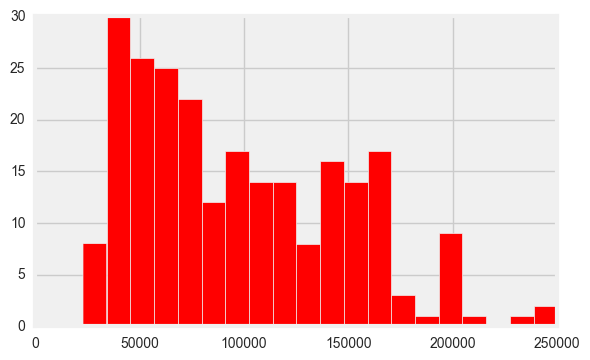

In [69]:
# checking distribution of salaries

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
ax=dfsx['Salary'].hist(bins=20, color='red')

In [70]:
# creating the target column of whether or not the salary is high
# i chose a threshold of $100,000

def check_highsal(x):
    if x >= 100000:
        return 1
    else:
        return 0

In [71]:
dfsx['HighSalary'] = df['Salary'].map(check_highsal)

In [72]:
dfsx.head()

,JobTitle,Company,Location,Salary,Summary,HighSalary
0,biostatistics/bioinformatics research scientist,unc charlotte,charlotte,70000.0,genetics/genomics data analysis (esp. enjoy co...,0
1,digital marketing (data scientist),"kennedy unlimited inc, professional staffing",charlotte,115000.0,responsibilities of the digital marketing (dat...,0
2,senior quantitative finance analyst,iits,charlotte,140000.0,"assessing conceptual foundations of a model, m...",1
3,svp quantitative analyst - multiple vacancies,selby jennings,charlotte,150000.0,a top tier investment bank is looking for an e...,1
4,data scientist,oak grove partners,charlotte,130000.0,data visualization tools:. facilitate fast and...,1


In [73]:
# cleaning the summary column some more

dfsx['Summary'] = dfsx['Summary'].apply(lambda x: x.replace('.',''))
dfsx['Summary'] = dfsx['Summary'].apply(lambda x: x.replace('/',' '))
dfsx['Summary'] = dfsx['Summary'].apply(lambda x: x.replace('(',''))
dfsx['Summary'] = dfsx['Summary'].apply(lambda x: x.replace(')',''))
dfsx['Summary'] = dfsx['Summary'].apply(lambda x: x.replace(':',''))
dfsx['Summary'] = dfsx['Summary'].apply(lambda x: x.replace(',',''))

In [74]:
dfsx.head()

,JobTitle,Company,Location,Salary,Summary,HighSalary
0,biostatistics/bioinformatics research scientist,unc charlotte,charlotte,70000.0,genetics genomics data analysis esp enjoy comp...,0
1,digital marketing (data scientist),"kennedy unlimited inc, professional staffing",charlotte,115000.0,responsibilities of the digital marketing data...,0
2,senior quantitative finance analyst,iits,charlotte,140000.0,assessing conceptual foundations of a model mo...,1
3,svp quantitative analyst - multiple vacancies,selby jennings,charlotte,150000.0,a top tier investment bank is looking for an e...,1
4,data scientist,oak grove partners,charlotte,130000.0,data visualization tools facilitate fast and e...,1


In [75]:
# splitting the summary into a list of words
dfsx['Summary'] = dfsx['Summary'].map(lambda x: x.split(' '))

In [76]:
# throwing all the lists of words into a list to create a single list of all words in all summaries
listx=[]
for i in dfsx['Summary']:
    listx.extend(i)

In [77]:
# Finding the words that appear most frequently in the summaries
pd.Series(listx).value_counts()

data           359
and            260
a              132
to             130
of             116
the            113
scientist       95
in              89
with            81
for             81
is              74
experience      55
as              41
scientists      38
will            37
or              37
analysis        37
this            34
looking         32
medical         31
research        31
analytics       27
an              27
join            26
team            26
company         25
laboratory      25
their           24
be              24
learning        23
              ... 
between          1
priest           1
client’s         1
experiences      1
artificial       1
afactory         1
mentor           1
pedigree         1
amt              1
best             1
back-end         1
rabbis           1
familiarity      1
formulation      1
variables        1
accounting       1
assembling       1
fish             1
national         1
online           1
respond          1
vision      

In [78]:
# I chose 5 words from the list above to create variables for
# This cell contains code for creating the variable for the word research

def check_research(x):
    if 'research' in x:
        return 1
    else:
        return 0
    
dfsx['s_research'] = dfsx['Summary'].map(check_research)

In [79]:
dfsx.head()

,JobTitle,Company,Location,Salary,Summary,HighSalary,s_research
0,biostatistics/bioinformatics research scientist,unc charlotte,charlotte,70000.0,"[genetics, genomics, data, analysis, esp, enjo...",0,1
1,digital marketing (data scientist),"kennedy unlimited inc, professional staffing",charlotte,115000.0,"[responsibilities, of, the, digital, marketing...",0,0
2,senior quantitative finance analyst,iits,charlotte,140000.0,"[assessing, conceptual, foundations, of, a, mo...",1,0
3,svp quantitative analyst - multiple vacancies,selby jennings,charlotte,150000.0,"[a, top, tier, investment, bank, is, looking, ...",1,0
4,data scientist,oak grove partners,charlotte,130000.0,"[data, visualization, tools, facilitate, fast,...",1,0


In [80]:
# creating the variable for the word analytics
def check_analytics(x):
    if 'analytics' in x:
        return 1
    else:
        return 0
    
dfsx['s_analytics'] = dfsx['Summary'].map(check_analytics)

In [81]:
# creating the variable for the word medical
def check_medical(x):
    if 'medical' in x:
        return 1
    else:
        return 0
    
dfsx['s_medical'] = dfsx['Summary'].map(check_medical)

In [82]:
# creating the variable for the word analysis
def check_analysis(x):
    if 'analysis' in x:
        return 1
    else:
        return 0
    
dfsx['s_analysis'] = dfsx['Summary'].map(check_analysis)

In [83]:
# creating the variable for the word experience
def check_experience(x):
    if 'experience' in x:
        return 1
    else:
        return 0
    
dfsx['s_experience'] = dfsx['Summary'].map(check_experience)

In [84]:
dfsx.head()

,JobTitle,Company,Location,Salary,Summary,HighSalary,s_research,s_analytics,s_medical,s_analysis,s_experience
0,biostatistics/bioinformatics research scientist,unc charlotte,charlotte,70000.0,"[genetics, genomics, data, analysis, esp, enjo...",0,1,0,0,1,0
1,digital marketing (data scientist),"kennedy unlimited inc, professional staffing",charlotte,115000.0,"[responsibilities, of, the, digital, marketing...",0,0,0,0,0,0
2,senior quantitative finance analyst,iits,charlotte,140000.0,"[assessing, conceptual, foundations, of, a, mo...",1,0,0,0,0,0
3,svp quantitative analyst - multiple vacancies,selby jennings,charlotte,150000.0,"[a, top, tier, investment, bank, is, looking, ...",1,0,1,0,0,0
4,data scientist,oak grove partners,charlotte,130000.0,"[data, visualization, tools, facilitate, fast,...",1,0,0,0,0,0


In [85]:
# making summy variables for the locations
dfsx=pd.concat([dfsx,pd.get_dummies(dfsx['Location'], drop_first=True, prefix='L')], axis = 1)

In [86]:
# i decided to make variables for only the most frequently occuring companies
dfsx['Company'].value_counts()

jobspring partners                                       18
harnham                                                  12
workbridge associates                                    11
selby jennings                                           10
university of washington medical center                   9
university of texas at austin                             7
university of washington                                  6
lighthouse recruiting                                     5
intermountain healthcare                                  5
university of utah                                        4
kennedy unlimited inc, professional staffing              3
texas department of public safety                         3
lt                                                        3
zerochaos                                                 3
los angeles county department of human resources          3
signature science, llc                                    2
macp los angeles                        

In [87]:
# creating the variable for the company jobspring
def c_jobspring(x):
    if 'jobspring partners' in x:
        return 1
    else:
        return 0
    
dfsx['c_jobspringpartners'] = dfsx['Company'].map(c_jobspring)

In [88]:
# creating the variable for the company harnham
def c_harnham(x):
    if 'harnham' in x:
        return 1
    else:
        return 0
    
dfsx['c_harnham'] = dfsx['Company'].map(c_harnham)

In [89]:
# creating the variable for the company workbridge associates
def c_workbridge(x):
    if 'workbridge associates' in x:
        return 1
    else:
        return 0
    
dfsx['c_workbridge'] = dfsx['Company'].map(c_workbridge)

In [90]:
# creating the variable for the company selby jennings
def c_selby(x):
    if 'selby jennings' in x:
        return 1
    else:
        return 0
    
dfsx['c_selby'] = dfsx['Company'].map(c_selby)

In [91]:
dfsx.head()

,JobTitle,Company,Location,Salary,Summary,HighSalary,s_research,s_analytics,s_medical,s_analysis,...,L_portland,L_salt lake city,L_san diego,L_san francisco,L_san jose,L_seattle,c_jobspringpartners,c_harnham,c_workbridge,c_selby
0,biostatistics/bioinformatics research scientist,unc charlotte,charlotte,70000.0,"[genetics, genomics, data, analysis, esp, enjo...",0,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,digital marketing (data scientist),"kennedy unlimited inc, professional staffing",charlotte,115000.0,"[responsibilities, of, the, digital, marketing...",0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,senior quantitative finance analyst,iits,charlotte,140000.0,"[assessing, conceptual, foundations, of, a, mo...",1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,svp quantitative analyst - multiple vacancies,selby jennings,charlotte,150000.0,"[a, top, tier, investment, bank, is, looking, ...",1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1
4,data scientist,oak grove partners,charlotte,130000.0,"[data, visualization, tools, facilitate, fast,...",1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [92]:
# I decided to make variables for words that appeared in job titles that I felt could be relevant
# to whether or not the job would have a high salary. This cell and the following 9 cells contain
# the code for creating those variables
def datascientist(x):
    if 'data scientist' in x:
        return 1
    else:
        return 0
    
dfsx['jt_datascientist'] = dfsx['JobTitle'].map(datascientist)

In [93]:
def analyst(x):
    if 'analyst' in x:
        return 1
    else:
        return 0
    
dfsx['jt_analyst'] = dfsx['JobTitle'].map(analyst)

In [94]:
def lead(x):
    if 'lead' in x:
        return 1
    else:
        return 0
    
dfsx['jt_lead'] = dfsx['JobTitle'].map(lead)

In [95]:
def engineer(x):
    if 'engineer' in x:
        return 1
    else:
        return 0
    
dfsx['jt_engineer'] = dfsx['JobTitle'].map(engineer)

In [96]:
def manager(x):
    if 'manager' in x:
        return 1
    else:
        return 0
    
dfsx['jt_manager'] = dfsx['JobTitle'].map(manager)

In [97]:
def senior(x):
    if ('senior' in x) or ('sr' in x):
        return 1
    else:
        return 0
    
dfsx['jt_senior'] = dfsx['JobTitle'].map(senior)

In [98]:
def level1(x):
    if ('1' in x) or (' i' in x):
        return 1
    else:
        return 0
    
dfsx['jt_level1'] = dfsx['JobTitle'].map(level1)

In [99]:
def level2(x):
    if ('2' in x) or (' ii' in x):
        return 1
    else:
        return 0
    
dfsx['jt_level2'] = dfsx['JobTitle'].map(level2)

In [100]:
def level3(x):
    if ('3' in x) or (' iii' in x):
        return 1
    else:
        return 0
    
dfsx['jt_level3'] = dfsx['JobTitle'].map(level3)

In [101]:
def coordinator(x):
    if 'coordinator' in x:
        return 1
    else:
        return 0
    
dfsx['jt_coordinator'] = dfsx['JobTitle'].map(coordinator)

In [102]:
dfsx.head()

,JobTitle,Company,Location,Salary,Summary,HighSalary,s_research,s_analytics,s_medical,s_analysis,...,jt_datascientist,jt_analyst,jt_lead,jt_engineer,jt_manager,jt_senior,jt_level1,jt_level2,jt_level3,jt_coordinator
0,biostatistics/bioinformatics research scientist,unc charlotte,charlotte,70000.0,"[genetics, genomics, data, analysis, esp, enjo...",0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,digital marketing (data scientist),"kennedy unlimited inc, professional staffing",charlotte,115000.0,"[responsibilities, of, the, digital, marketing...",0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,senior quantitative finance analyst,iits,charlotte,140000.0,"[assessing, conceptual, foundations, of, a, mo...",1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,svp quantitative analyst - multiple vacancies,selby jennings,charlotte,150000.0,"[a, top, tier, investment, bank, is, looking, ...",1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,data scientist,oak grove partners,charlotte,130000.0,"[data, visualization, tools, facilitate, fast,...",1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [103]:
# creating a final dataframe that I will use as the basis of my models
dffinal=dfsx.iloc[:,5:]

In [104]:
dffinal.head()

,HighSalary,s_research,s_analytics,s_medical,s_analysis,s_experience,L_atlanta,L_austin,L_boston,L_charlotte,...,jt_datascientist,jt_analyst,jt_lead,jt_engineer,jt_manager,jt_senior,jt_level1,jt_level2,jt_level3,jt_coordinator
0,0,1,0,0,1,0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,1,0,0,0,0
3,1,0,1,0,0,0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0


## Logistic Regression:
In the following cells I used GridSearchCV to determine the best Logistic Regression and knn classifier parameters, as well as using cross_val_score to check the scores for those models.

In [105]:
import numpy as np
import pandas as pd
import patsy

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV

/Users/ct/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/ct/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [106]:
X=dffinal.iloc[:,1:]
y=dffinal.iloc[:,0]

### Logistic Regression

In [107]:
logreg = LogisticRegression(solver='liblinear')
C_vals = [0.0001, 0.001, 0.01, 0.1, .15, .25, .275, .33, 0.5, .66, 0.75, 1.0, 2.5, 5.0, 10.0, 100.0, 1000.0]
penalties = ['l1','l2']

gs = GridSearchCV(logreg, {'penalty': penalties, 'C': C_vals},\
                  verbose=False, cv=5)
gs.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.0001, 0.001, 0.01, 0.1, 0.15, 0.25, 0.275, 0.33, 0.5, 0.66, 0.75, 1.0, 2.5, 5.0, 10.0, 100.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=False)

In [108]:
# getting the best parameters for a logistic regression
gs.best_params_

{'C': 0.0001, 'penalty': 'l1'}

In [109]:
gs.best_estimator_

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [110]:
# getting the best score
gs.best_score_

0.8916666666666667

In [111]:
# getting the cross val score
cross_val_score(gs, X, y, n_jobs=1, cv=5).mean()

0.89173360833695181

### KNeighborsClassifier

In [112]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
n_neighbors = [1,3,5,7,9,11,13,15,17,19]
p = [1,2]

In [113]:
gs2 = GridSearchCV(knn, {'n_neighbors': n_neighbors, 'p': p},cv=5, verbose=False)
gs2.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=False)

In [114]:
# getting best score
gs2.best_score_

0.8916666666666667

In [115]:
# getting best parameters for knn
gs2.best_params_

{'n_neighbors': 7, 'p': 1}

In [116]:
# getting the cross validation score
cross_val_score(gs2, X, y, n_jobs=1, cv=5).mean()

0.89173360833695181

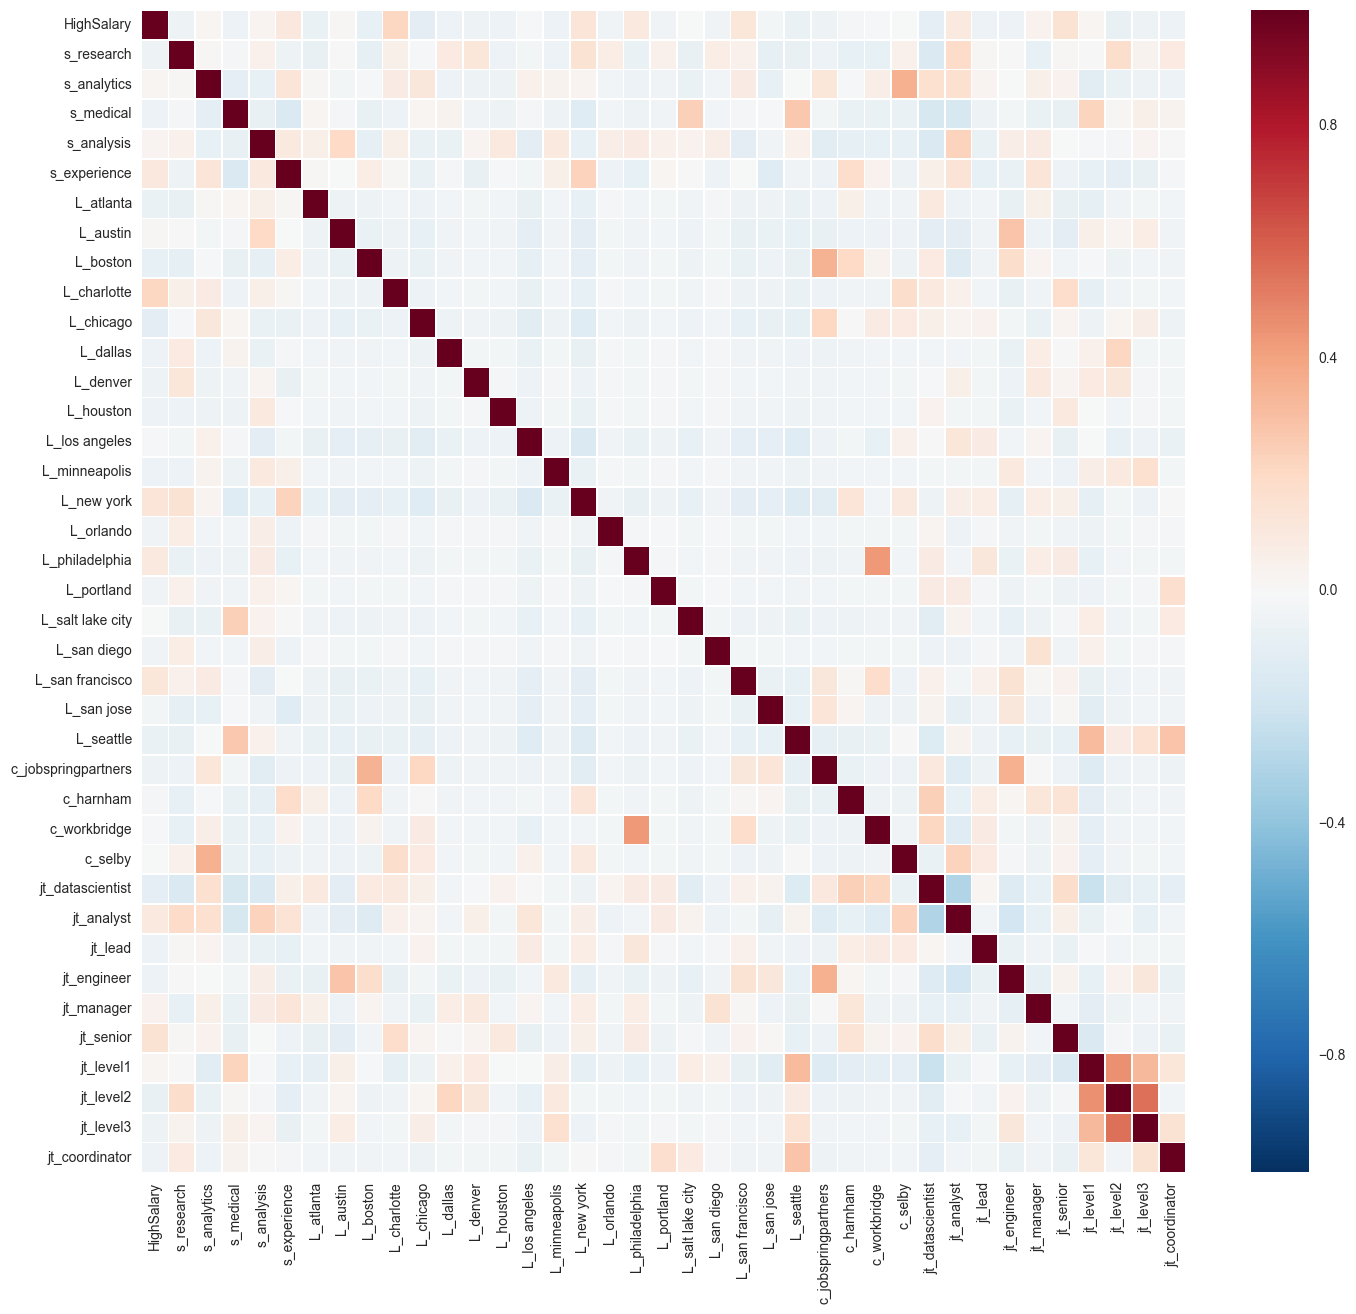

In [117]:
# creating a correlation matrix
corr=dffinal.corr()
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(corr,linewidths=.5, ax=ax);

## Insights:
From the correlation matrix above, it appears that location is an important factor in determining the salary. Certain cities like New York, San Francisco, and surprisingly Charlotte look to have a correlation to high salaries. Also, whether the position is senior level or not seems to be a factor as well.

As I mentioned earlier, the fact that there are not a lot of job postings with salary information makes it more difficult to build a strong model for predicting salary range. Also, considering the large number of features I used for my models, there is a chance that the models could be overfit for the data. In this situation it would be more beneficial if we had more salary data that we could use to fit,test, and cross validate a model on.